In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Task 1:


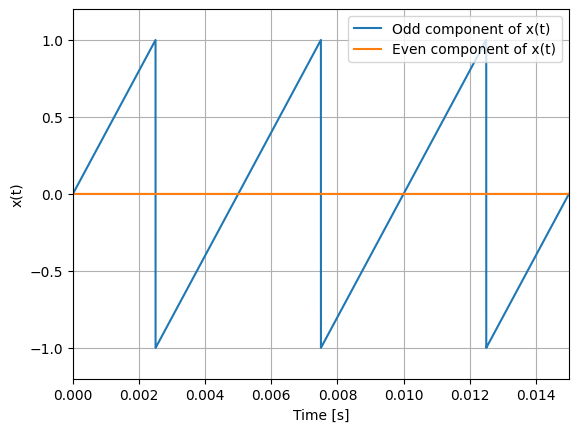

In [106]:
start = 0             # Start value
stop = 15*10**(-3)    # Stop value
increment = 0.000001  # Increment value (TODO: we might want to make this even smaller?)

t = np.arange(start, stop, increment)

x_odd = signal.sawtooth(2*np.pi * 200 * (t-2.5*10**(-3)))

x_even = (x_odd - x_odd)/2

# Create a new figure
fig, ax = plt.subplots()

# Plot the curve with x-values 't' and y-values 'x' into the figure 'ax' with the legend entry 'My Signal'
ax.plot(t, x_odd, label='Odd component of x(t)')
ax.plot(t, x_even, label='Even component of x(t)')


ax.set_ylabel('x(t)')  # Add y-axis label
ax.set_xlabel("Time [s]") # Add x-axis label
ax.grid(True)              # Turn on the grid
ax.set_xlim(0, 0.015)       # Set x-axis limits 0-15 ms
ax.set_ylim(-1.2, 1.2)     # Set y-axis limits
ax.legend(loc='upper right') # Add legend
plt.show()                 # Show the plot

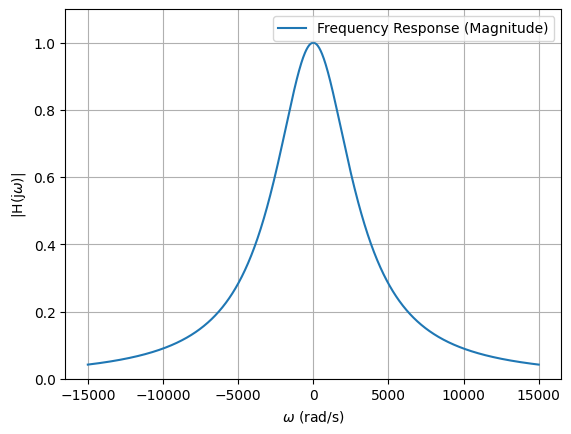

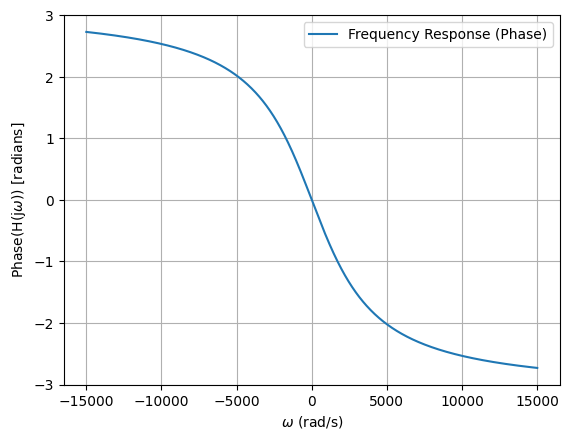

In [107]:
alpha = 1000 * np.pi
omega = np.linspace(-15e3, 15e3, 1000)  # Dense grid of frequencies

H = (alpha**2) / ((alpha + 1j*omega)**2)

# Plot the magnitude response
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()

ax1.plot(omega, np.abs(H), label='Frequency Response (Magnitude)')
ax1.set_xlabel('$\omega$ (rad/s)')
ax1.set_ylabel('|H(j$\omega$)|')
ax1.set_ylim(0, 1.15)     # Set y-axis limits
ax1.legend(loc='upper right')       # Add legend
ax1.grid(True)                      # Turn on the grid

# Plot the phase response
ax2.plot(omega, np.angle(H), label='Frequency Response (Phase)')
ax2.set_xlabel('$\omega$ (rad/s)')
ax2.set_ylabel('Phase(H(j$\omega$)) [radians]')
ax2.legend(loc='upper right')       # Add legend
ax2.grid(True)                      # Turn on the grid

plt.show()